# Project 3- Bitcoin’s Price Correlation with the Stock Market & BTC Price Prediction 
## Analyzing the evolution of Bitcoin’s price correlation with the stock market over time

## Part 1: Use Sentiment Analysis to see the sentiments expressed about Bitcoin in news headlines, social media, and other texts

## Has there been a change in how Bitcoin’s price moves with the market?

* Before 2020, crypto assets such as Bitcoin and Ethereum showed little correlation with major stock indices. They were thought to help diversify risk and act as a hedge against swings in other asset classes and inflation.
* Bitcoin’s correlation with stocks has turned higher than that between stocks and other assets such as gold, investment grade bonds, and major currencies which suggests that suggest that Bitcoin has been acting as a risk asset.
* Since 2020, sentiment in crypto and equity markets indicate a growing interconnectedness between the two asset classes that could destabilize financial markets.
* An explanation for this could be the fact that central banks flooded markets with liquidity in 2020 when the pandemic happened and increased money supply much quicker than in the past.
* Another reason why we can say that there has been a change in how Bitcoin’s price moves with the market is because Bitcoin has always been considered inflation-proof and could therefore be a hedge against rising inflation. However, its extreme volatility and growing correlation with the stocks threatens this theory.


In [1]:
# Initial imports
import os
import pandas as pd
import nltk as nltk
nltk.download('vader_lexicon')

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tendayijanetmushava/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Bad key savefig.frameon in file /opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /opt/anaconda3/envs/pyvizenv/lib/python3.

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Read your api key environment variable
api_key = "e4c6c7d8ef714789a92504c2ee804e93"

In [4]:
from newsapi import NewsApiClient

In [5]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [6]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q= "bitcoin", language= "en", sort_by= "relevancy")
btc_articles["totalResults"]

8491

In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in btc_articles["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
bitcoin_df = pd.DataFrame(bitcoin_sentiments)  
bitcoin_df

,text,compound,positive,negative,neutral
0,Even if you arent paying attention to Bitcoin ...,0.5859,0.124,0.000,0.876
1,El Salvador introduced Bitcoin as a legal tend...,0.3182,0.105,0.000,0.895
2,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.084,0.871
3,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000
4,Netflix\r\n is making a docuseries about one o...,-0.7096,0.000,0.169,0.831
5,"Bitcoin, the largest digital asset, extended i...",0.3612,0.068,0.000,0.932
6,"On some level, the new mayor is simply employi...",0.1779,0.052,0.000,0.948
7,British entrepreneur and financier Richard ODe...,0.6808,0.185,0.000,0.815
8,Russia's central bank on Thursday proposed ban...,-0.4215,0.000,0.088,0.912
9,"Over the last five years, about 25,000 of thos...",-0.4939,0.000,0.091,0.909


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.095110,0.080000,0.047950,0.872050
std,0.439234,0.058327,0.058568,0.068768
min,-0.709600,0.000000,0.000000,0.729000
25%,-0.301550,0.043250,0.000000,0.829500
50%,0.127550,0.064000,0.000000,0.876000
75%,0.417375,0.124000,0.090250,0.917000
max,0.778300,0.185000,0.169000,1.000000


## Natural Language Processing- Tokenizer

In [9]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [10]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tendayijanetmushava/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stop_words = stopwords.words("english")

# Expand the default stopwords list if necessary

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z0-9 ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean.lower())
    
    # Lemmatize words into root words
    root_words = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase and remove the stop words
    words = [word for word in words if word not in stop_words]
    
    return root_words

In [13]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tendayijanetmushava/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df["text"].apply(tokenizer)
bitcoin_df.head()

,text,compound,positive,negative,neutral,tokens
0,Even if you arent paying attention to Bitcoin ...,0.5859,0.124,0.000,0.876,"[even, if, you, arent, paying, attention, to, ..."
1,El Salvador introduced Bitcoin as a legal tend...,0.3182,0.105,0.000,0.895,"[el, salvador, introduced, bitcoin, a, a, lega..."
2,Israeli national Tal Prihar pled guilty to rou...,-0.3182,0.045,0.084,0.871,"[israeli, national, tal, prihar, pled, guilty,..."
3,"In a new blog post the company said that 4,836...",0.0000,0.000,0.000,1.000,"[in, a, new, blog, post, the, company, said, t..."
4,Netflix\r\n is making a docuseries about one o...,-0.7096,0.000,0.169,0.831,"[netflix, is, making, a, docuseries, about, on..."


## List the top 50 words for Bitcoin

In [15]:
from collections import Counter

In [16]:
# Function token_count generates the top 50 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [17]:
# Use token_count to get the top 50 words for Bitcoin
top_btc_wrds = tokenizer(bitcoin_df.text.str.cat())
token_count(top_btc_wrds, 50)

[('the', 42),
 ('of', 21),
 ('a', 20),
 ('to', 16),
 ('and', 16),
 ('in', 12),
 ('bitcoin', 11),
 ('by', 6),
 ('ha', 6),
 ('company', 6),
 ('new', 6),
 ('it', 6),
 ('that', 5),
 ('from', 5),
 ('is', 5),
 ('on', 5),
 ('you', 4),
 ('have', 3),
 ('salvador', 3),
 ('u', 3),
 ('alex', 3),
 ('castro', 3),
 ('monetary', 3),
 ('fund', 3),
 ('el', 3),
 ('blog', 3),
 ('post', 3),
 ('said', 3),
 ('were', 3),
 ('thursday', 3),
 ('cryptocurrency', 3),
 ('about', 3),
 ('one', 3),
 ('time', 3),
 ('lichtenstein', 3),
 ('wallet', 3),
 ('charsthe', 3),
 ('at', 3),
 ('for', 3),
 ('if', 2),
 ('their', 2),
 ('value', 2),
 ('last', 2),
 ('week', 2),
 ('with', 2),
 ('high', 2),
 ('legal', 2),
 ('alongside', 2),
 ('illustration', 2),
 ('international', 2)]

## Generate a word cloud for BTC to summarize the news for BTC

In [18]:
# Imports for Word Clouds
import sys
print(sys.executable)

/opt/anaconda3/envs/pyvizenv/bin/python


In [19]:
# Imports for Word Clouds
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [30.0, 10.0]

Text(0.5, 1.0, 'Bitcoin Word Cloud')

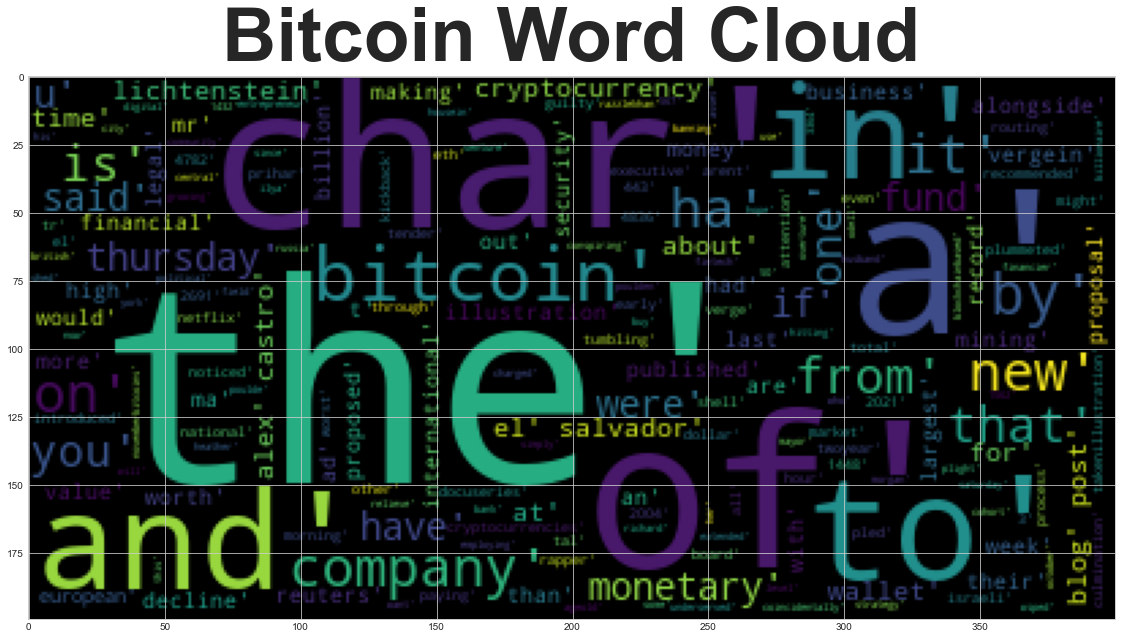

In [20]:
# Generate the Bitcoin word cloud
btc_wc = bitcoin_df['tokens'].astype(str)
b_wc = WordCloud().generate(' '.join(btc_wc))
plt.imshow(b_wc)
plt.title(label='Bitcoin Word Cloud', fontdict={'fontsize': 75, 'fontweight':'bold'})